## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import random
from sklearn.metrics import classification_report

## Import Dataset

In [2]:
# Loading the CSV file into a DataFrame
df = pd.read_csv('crime.csv')

## Dataset Visualization

In [3]:
df

,state_ut,district,year,murder,attempt_to_murder,culpable_homicide_not_amounting_to_murder,rape,custodial_rape,other_rape,kidnapping_abduction,...,hurt_grevious_hurt,dowry_deaths,assault_on_women_with_intent_to_outrage_her_modesty,insult_to_modesty_of_women,cruelty_by_husband_or_his_relatives,importation_of_girls_from_foreign_countries,causing_death_by_negligence,other_ipc_crimes,total_ipc_crimes,risk
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,1
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,1
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,1
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,1
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,6,0
8593,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,227,18,53,6,327,0,292,1144,5558,1
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,0
8595,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,186,0,2,0,1,0,44,392,787,0


In [4]:
df.columns

Index(['state_ut', 'district', 'year', 'murder', 'attempt_to_murder',
       'culpable_homicide_not_amounting_to_murder', 'rape', 'custodial_rape',
       'other_rape', 'kidnapping_abduction',
       'kidnapping_and_abduction_of_women_and_girls',
       'kidnapping_and_abduction_of_others', 'dacoity',
       'preparation_and_assembly_for_dacoity', 'robbery', 'burglary', 'theft',
       'auto_theft', 'other_theft', 'riots', 'criminal_breach_of_trust',
       'cheating', 'counterfieting', 'arson', 'hurt_grevious_hurt',
       'dowry_deaths', 'assault_on_women_with_intent_to_outrage_her_modesty',
       'insult_to_modesty_of_women', 'cruelty_by_husband_or_his_relatives',
       'importation_of_girls_from_foreign_countries',
       'causing_death_by_negligence', 'other_ipc_crimes', 'total_ipc_crimes',
       'risk'],
      dtype='object')

In [5]:
df.shape

(8597, 34)

## Data Quality Assessment

In [6]:
# Check for duplicate records
duplicate_records = df[df.duplicated()]
if not duplicate_records.empty:
    print("Duplicate Records Found:")
    print(duplicate_records)
else:
    print("No duplicate records found.")

# Check for data consistency and integrity issues in each column
for column in df.columns:
    inconsistent_data = df[df[column].apply(lambda x: isinstance(x, str) and x.lower() != 'expected_value')]
    if not inconsistent_data.empty:
        print(f"Inconsistent Data Found in '{column}':")
        print(inconsistent_data)
    else:
        print(f"No inconsistent data found in '{column}'.")

    missing_values = df[df[column].isnull()]
    if not missing_values.empty:
        print(f"Missing Values Found in '{column}':")
        print(missing_values)
    else:
        print(f"No missing values found in '{column}'.")

No duplicate records found.
Inconsistent Data Found in 'state_ut':
            state_ut       district  year  murder  attempt_to_murder  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
8592        DELHI UT            STF  2012       0                  1   
8593        DELHI UT           WEST  2012      52                 37   
8594     LAKSHADWEEP    LAKSHADWEEP  2012       0                  0   
8595      PUDUCHERRY       KARAIKAL  2012       5                  6   
8596      PUDUCHERRY     PUDUCHERRY  2012      24                 21   

      culpable_homicide_not_amounting_to_murder  rape  custodial_rap

## Descriptive Statistics

In [7]:
# Get numerical columns
numerical_cols = df.select_dtypes(include=[np.number])
numerical_cols = numerical_cols.drop(columns=['year', 'risk'])

# Compute basic statistics
basic_stats = numerical_cols.describe().transpose()

# Add median and mode
basic_stats['median'] = numerical_cols.median()
basic_stats['mode'] = numerical_cols.mode().iloc[0]

# Add standard deviation
basic_stats['std_dev'] = numerical_cols.std()

# Add minimum and maximum
basic_stats['min'] = numerical_cols.min()
basic_stats['max'] = numerical_cols.max()

print(basic_stats)

                                                     count         mean  \
murder                                              8597.0    46.823659   
attempt_to_murder                                   8597.0    40.941840   
culpable_homicide_not_amounting_to_murder           8597.0     5.189485   
rape                                                8597.0    27.816331   
custodial_rape                                      8597.0     0.003024   
other_rape                                          8597.0    27.813307   
kidnapping_abduction                                8597.0    41.509480   
kidnapping_and_abduction_of_women_and_girls         8597.0    30.697569   
kidnapping_and_abduction_of_others                  8597.0    10.811911   
dacoity                                             8597.0     6.910434   
preparation_and_assembly_for_dacoity                8597.0     3.715366   
robbery                                             8597.0    28.878330   
burglary                 

## Correlation Analysis

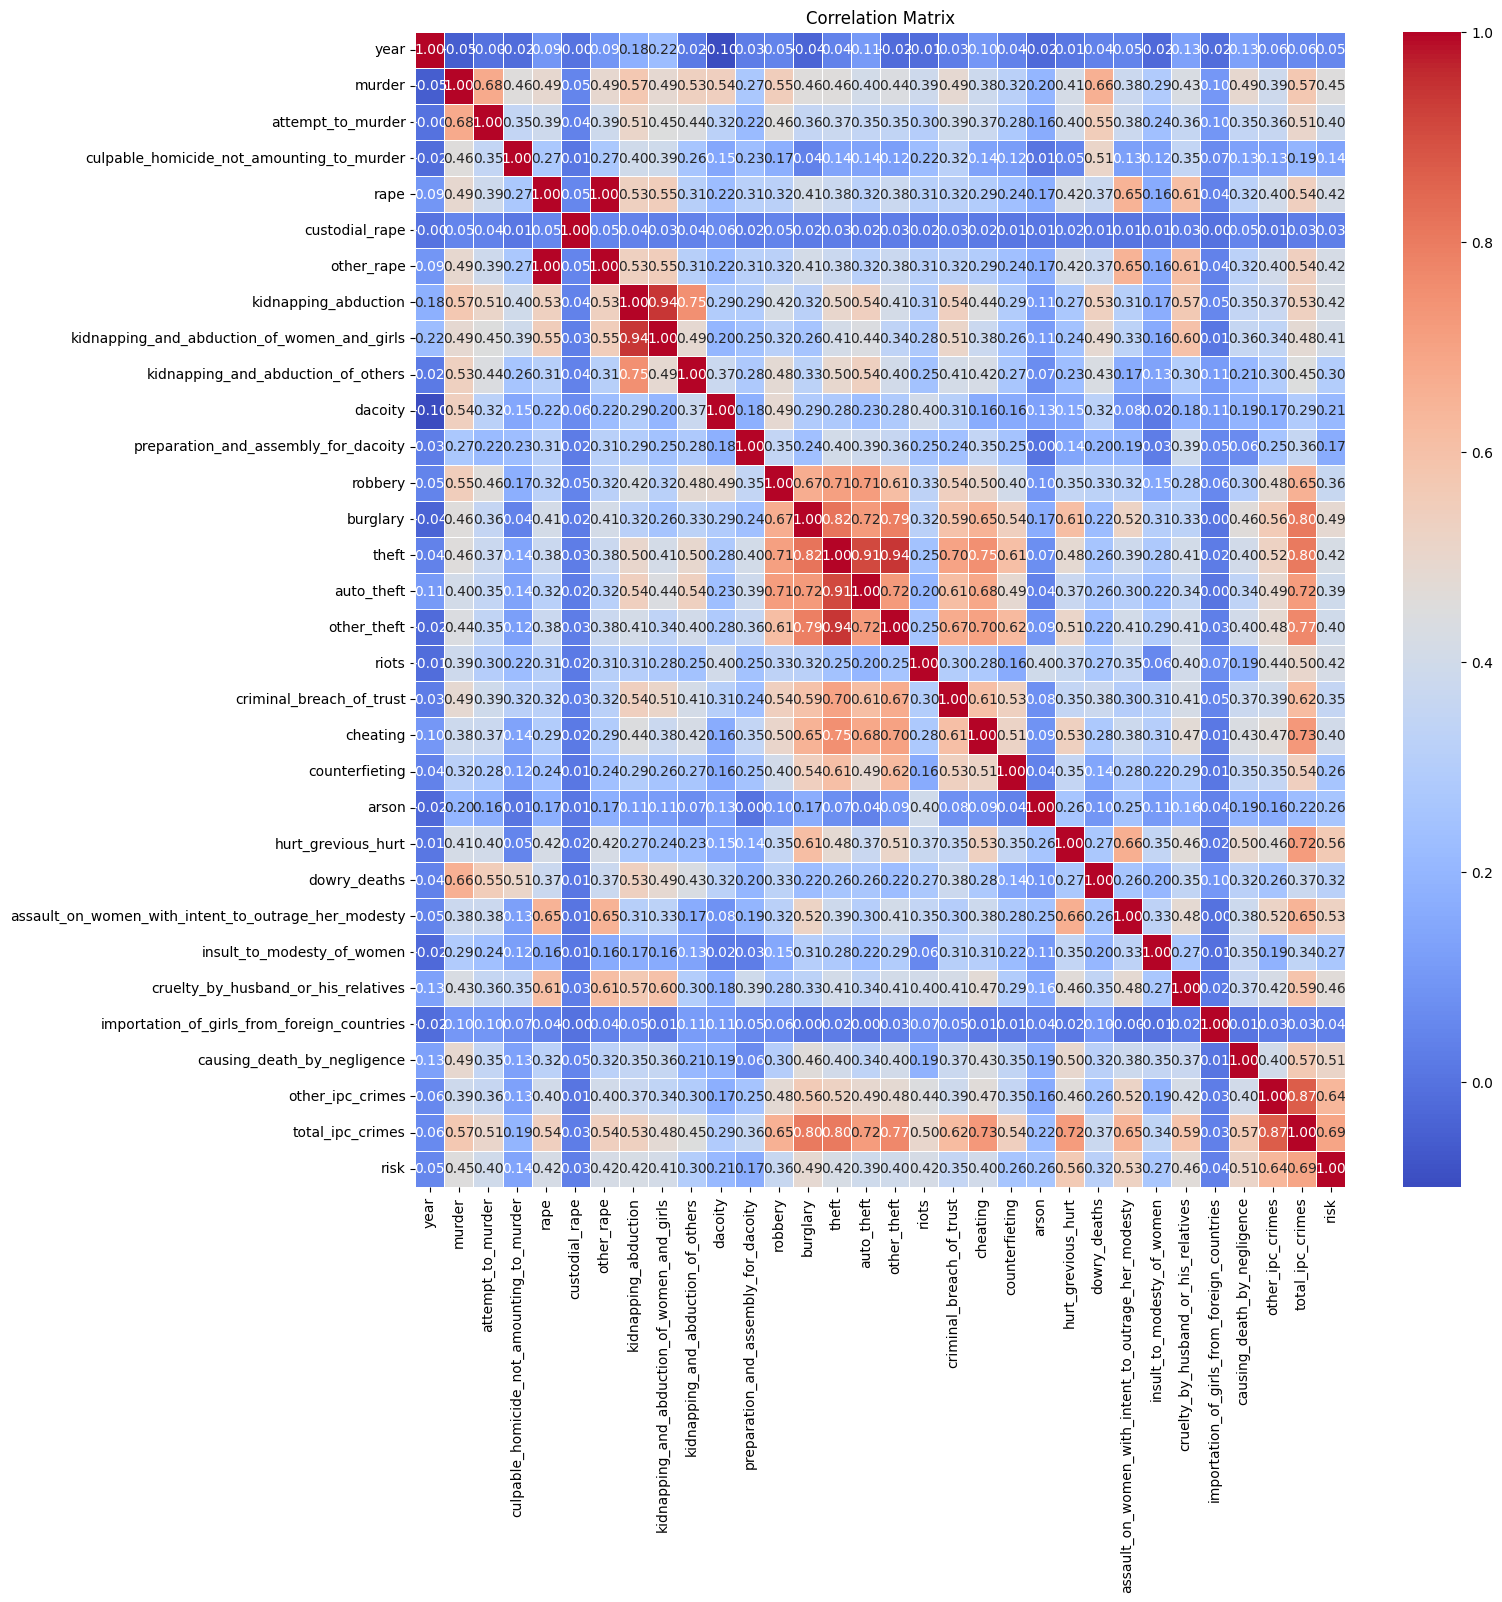

In [8]:
# Compute correlation matrix
corr_matrix = df.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Anomaly Detection

In [9]:
# Select numeric columns for simplicity
X = df.select_dtypes(include="number")

# Train the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)  # Adjust contamination based on your dataset
isolation_forest.fit(X)

# Predict outliers
predictions = isolation_forest.predict(X)

# Identify outliers
outliers = df[predictions == -1]

# Display identified outliers
print("Identified Outliers:")
print(outliers)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Identified Outliers:
            state_ut        district  year  murder  attempt_to_murder  \
7     ANDHRA PRADESH  HYDERABAD CITY  2001     111                113   
18    ANDHRA PRADESH     RANGA REDDY  2001     214                 95   
94             BIHAR     MUZAFFARPUR  2001     153                162   
96             BIHAR         NALANDA  2001     208                249   
99             BIHAR           PATNA  2001     434                581   
...              ...             ...   ...     ...                ...   
8586        DELHI UT      NORTH-EAST  2012      49                 65   
8588        DELHI UT           OUTER  2012      96                 60   
8589        DELHI UT           SOUTH  2012      39                 19   
8590        DELHI UT      SOUTH-EAST  2012      46                 69   
8593        DELHI UT            WEST  2012      52                 37   

      culpable_homicide_not_amounting_to_murder  rape  custodial_rape  \
7                            

## Decision Tree

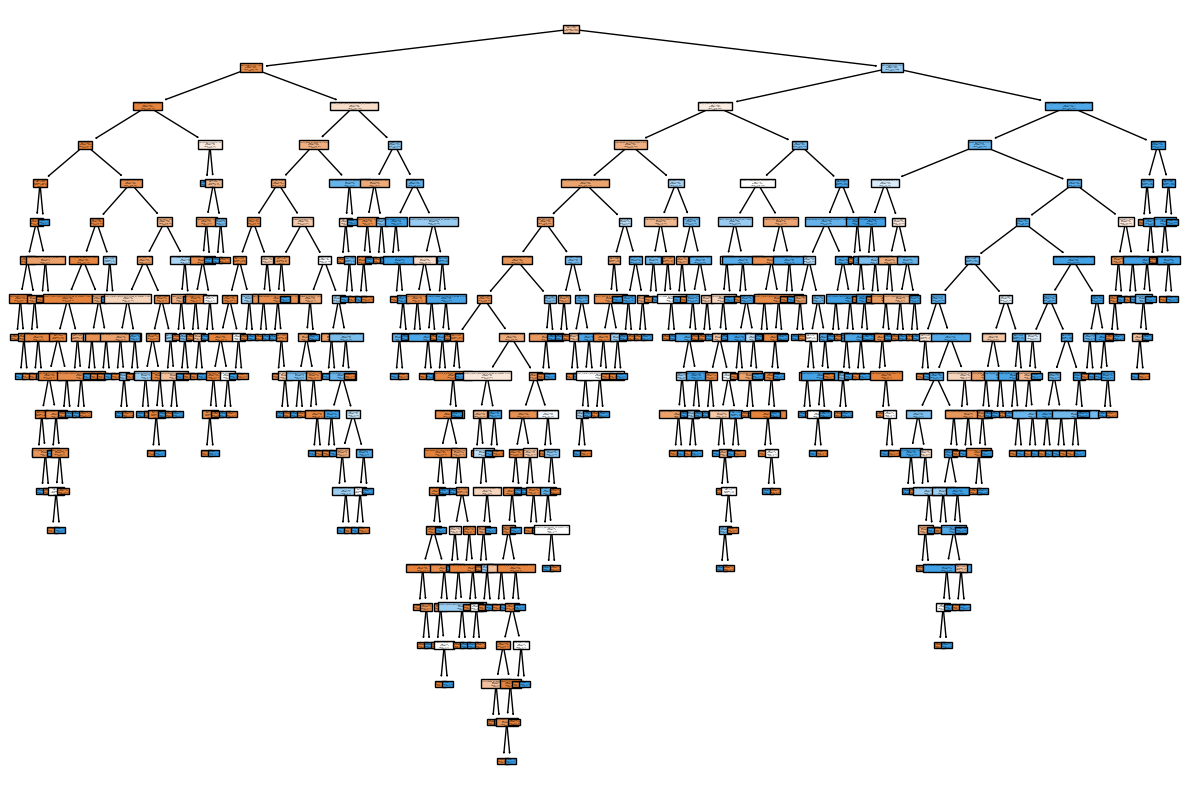

In [10]:
# Extract features (X) and target variable (y)
X = df.drop(['risk', 'district', 'total_ipc_crimes', 'other_ipc_crimes'], axis=1)  # Exclude the target variable
y = df['risk']

# Encode categorical variables
label_encoder = LabelEncoder()
X['state_ut'] = label_encoder.fit_transform(X['state_ut'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
dt_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=y.name)
plt.show()

## Feature Importance

In [11]:
# Make predictions on the testing set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = dt_model.score(X_test, y_test)

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print('\nFeature Importance:')
print(feature_importance)


Feature Importance:
                                              Feature  Importance
15                                              theft    0.447258
23                                 hurt_grevious_hurt    0.157894
27                cruelty_by_husband_or_his_relatives    0.065575
25  assault_on_women_with_intent_to_outrage_her_mo...    0.044348
29                        causing_death_by_negligence    0.033620
20                                           cheating    0.019653
0                                            state_ut    0.019591
10                 kidnapping_and_abduction_of_others    0.019340
17                                        other_theft    0.018647
16                                         auto_theft    0.016929
18                                              riots    0.016544
19                           criminal_breach_of_trust    0.015126
11                                            dacoity    0.012838
3                                   attempt_to_murder  

## KNN Classification & Federated Learning Implementation

In [12]:
# Set random seed for reproducibility
random.seed(42)

# Client Update Function
def client_update(X_train, y_train, X_test, k=5):
    # Initialize kNN classifier
    clf = KNeighborsClassifier(n_neighbors=k)
    # Shuffle training data
    X_train_shuffled, y_train_shuffled = shuffle_data(X_train, y_train)
    # Train the classifier
    clf.fit(X_train_shuffled, y_train_shuffled)
    # Predict labels for test data
    y_pred = clf.predict(X_test)
    return y_pred

# Shuffle Data Function
def shuffle_data(X, y):
    combined = list(zip(X, y))
    random.shuffle(combined)
    X_shuffled, y_shuffled = zip(*combined)
    return np.array(X_shuffled), np.array(y_shuffled)

# Server Aggregation Function
def server_aggregate(predictions):
    # Simply return the mode of the predictions
    aggregated_predictions = np.array(predictions).T
    aggregated_labels = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=aggregated_predictions)
    return aggregated_labels

# Evaluate Function
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

# Load CSV data
def load_data(file_path):
    df = pd.read_csv(file_path)
    X = df.drop(columns=['risk', 'state_ut', 'district']).values
    y = df['risk'].values
    return X, y

# Federated Learning Loop
def federated_learning(X_train_clients, y_train_clients, X_test, y_test, k=5, num_rounds=10):
    global_predictions = []

    for round in range(num_rounds):
        local_predictions = []
        # Set different random seed for each round
        random.seed(42 + round)
        for i, (X_train, y_train) in enumerate(zip(X_train_clients, y_train_clients)):
            # Perform client update
            y_pred = client_update(X_train, y_train, X_test, k=k)
            local_predictions.append(y_pred)
            # Compute client accuracy
            client_accuracy = evaluate(y_test, y_pred)
            print("Round {}, Client {}: Accuracy: {:.2f}%".format(round, i, client_accuracy * 100))
        
        # Server aggregates local predictions
        aggregated_labels = server_aggregate(local_predictions)
        global_predictions.append(aggregated_labels)

        # Evaluate global model
        accuracy = evaluate(y_test, aggregated_labels)
        print("Round {}, Test Accuracy: {:.2f}%".format(round, accuracy * 100))

# Load CSV data for federated learning
def load_federated_data(file_path, num_clients):
    X, y = load_data(file_path)
    X_train_clients = np.array_split(X, num_clients)
    y_train_clients = np.array_split(y, num_clients)
    return X_train_clients, y_train_clients

# Example usage
if __name__ == "__main__":
    # Path to the CSV file
    csv_file_path = "crime.csv"

    # Number of clients
    num_clients = 10

    # Load federated data
    X_train_clients, y_train_clients = load_federated_data(csv_file_path, num_clients)

    # Load test data
    X_test, y_test = load_data(csv_file_path)

    # Run federated learning
    federated_learning(X_train_clients, y_train_clients, X_test, y_test)

Round 0, Client 0: Accuracy: 98.56%
Round 0, Client 1: Accuracy: 98.99%
Round 0, Client 2: Accuracy: 98.71%
Round 0, Client 3: Accuracy: 98.48%
Round 0, Client 4: Accuracy: 98.39%
Round 0, Client 5: Accuracy: 98.81%
Round 0, Client 6: Accuracy: 98.81%
Round 0, Client 7: Accuracy: 98.85%
Round 0, Client 8: Accuracy: 98.58%
Round 0, Client 9: Accuracy: 98.51%
Round 0, Test Accuracy: 99.19%
Round 1, Client 0: Accuracy: 98.56%
Round 1, Client 1: Accuracy: 98.99%
Round 1, Client 2: Accuracy: 98.71%
Round 1, Client 3: Accuracy: 98.48%
Round 1, Client 4: Accuracy: 98.39%
Round 1, Client 5: Accuracy: 98.81%
Round 1, Client 6: Accuracy: 98.81%
Round 1, Client 7: Accuracy: 98.85%
Round 1, Client 8: Accuracy: 98.58%
Round 1, Client 9: Accuracy: 98.51%
Round 1, Test Accuracy: 99.19%
Round 2, Client 0: Accuracy: 98.56%
Round 2, Client 1: Accuracy: 98.99%
Round 2, Client 2: Accuracy: 98.71%
Round 2, Client 3: Accuracy: 98.48%
Round 2, Client 4: Accuracy: 98.39%
Round 2, Client 5: Accuracy: 98.81%
Ro

## Classification Report

In [13]:
# Load CSV data
def load_data(file_path):
    df = pd.read_csv(file_path)
    X = df.drop(columns=['risk', 'state_ut', 'district']).values
    y = df['risk'].values
    return X, y

# Split data into train and test sets
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Train and evaluate kNN classifier
def train_and_evaluate(X_train, X_test, y_train, y_test, k=5):
    # Initialize kNN classifier
    clf = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    clf.fit(X_train, y_train)
    # Predict labels for test data
    y_pred = clf.predict(X_test)
    # Compute classification report
    report = classification_report(y_test, y_pred)
    return report

# Main function
def main():
    # Path to the CSV file
    csv_file_path = "crime.csv"

    # Load data
    X, y = load_data(csv_file_path)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train and evaluate kNN classifier
    report = train_and_evaluate(X_train, X_test, y_train, y_test)
    print("Classification Report:\n", report)

# Run main function
if __name__ == "__main__":
    main()

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1155
           1       0.99      0.99      0.99       565

    accuracy                           0.99      1720
   macro avg       0.99      0.99      0.99      1720
weighted avg       0.99      0.99      0.99      1720



In [5]:
# Set random seed for reproducibility
random.seed(42)

# Initialize global kNN classifier
def initialize_global_model(k=5):
    return KNeighborsClassifier(n_neighbors=k)

# Client Update Function
def client_update(global_model, X_train, y_train):
    # Shuffle training data
    X_train_shuffled, y_train_shuffled = shuffle_data(X_train, y_train)
    # Train the local model
    global_model.fit(X_train_shuffled, y_train_shuffled)
    return global_model

# Shuffle Data Function
def shuffle_data(X, y):
    combined = list(zip(X, y))
    random.shuffle(combined)
    X_shuffled, y_shuffled = zip(*combined)
    return np.array(X_shuffled), np.array(y_shuffled)

# Server Aggregation Function
def aggregate_local_models(local_models):
    # For kNN, we can aggregate by taking the mode of the predictions
    return local_models[0]  # In a more complex scenario, you might average the parameters

# Evaluate Function
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

# Load CSV data
def load_data(file_path):
    df = pd.read_csv(file_path)
    X = df.drop(columns=['risk', 'state_ut', 'district']).values
    y = df['risk'].values
    return X, y

# Federated Learning Loop
def federated_learning(X_train_clients, y_train_clients, X_test, y_test, k=5, num_rounds=10):
    global_model = initialize_global_model(k=k)

    for round in range(num_rounds):
        local_models = []

        for i, (X_train, y_train) in enumerate(zip(X_train_clients, y_train_clients)):
            # Each client updates the global model
            local_model = client_update(global_model, X_train, y_train)
            local_models.append(local_model)

            # Compute client accuracy
            y_pred = local_model.predict(X_test)
            client_accuracy = evaluate(y_test, y_pred)
            print("Round {}, Client {}: Accuracy: {:.2f}%".format(round, i, client_accuracy * 100))
        
        # Server aggregates local models
        global_model = aggregate_local_models(local_models)

        # Evaluate global model
        global_predictions = global_model.predict(X_test)
        accuracy = evaluate(y_test, global_predictions)
        print("Round {}, Test Accuracy: {:.2f}%".format(round, accuracy * 100))

# Load CSV data for federated learning
def load_federated_data(file_path, num_clients):
    X, y = load_data(file_path)
    X_train_clients = np.array_split(X, num_clients)
    y_train_clients = np.array_split(y, num_clients)
    return X_train_clients, y_train_clients

# Example usage
if __name__ == "__main__":
    # Path to the CSV file
    csv_file_path = "crime.csv"

    # Number of clients
    num_clients = 10

    # Load federated data
    X_train_clients, y_train_clients = load_federated_data(csv_file_path, num_clients)

    # Load test data
    X_test, y_test = load_data(csv_file_path)

    # Run federated learning
    federated_learning(X_train_clients, y_train_clients, X_test, y_test)

Round 0, Client 0: Accuracy: 98.56%
Round 0, Client 1: Accuracy: 98.99%
Round 0, Client 2: Accuracy: 98.71%
Round 0, Client 3: Accuracy: 98.48%
Round 0, Client 4: Accuracy: 98.39%
Round 0, Client 5: Accuracy: 98.81%
Round 0, Client 6: Accuracy: 98.81%
Round 0, Client 7: Accuracy: 98.85%
Round 0, Client 8: Accuracy: 98.58%
Round 0, Client 9: Accuracy: 98.51%
Round 0, Test Accuracy: 98.51%
Round 1, Client 0: Accuracy: 98.56%
Round 1, Client 1: Accuracy: 98.99%
Round 1, Client 2: Accuracy: 98.71%
Round 1, Client 3: Accuracy: 98.48%
Round 1, Client 4: Accuracy: 98.39%
Round 1, Client 5: Accuracy: 98.81%
Round 1, Client 6: Accuracy: 98.81%
Round 1, Client 7: Accuracy: 98.85%
Round 1, Client 8: Accuracy: 98.58%
Round 1, Client 9: Accuracy: 98.51%
Round 1, Test Accuracy: 98.51%
Round 2, Client 0: Accuracy: 98.56%
Round 2, Client 1: Accuracy: 98.99%
Round 2, Client 2: Accuracy: 98.71%
Round 2, Client 3: Accuracy: 98.48%
Round 2, Client 4: Accuracy: 98.39%
Round 2, Client 5: Accuracy: 98.81%
Ro